In [0]:
import datascience as ds
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import plotly
import numpy as np
plt.style.use('fivethirtyeight')
%matplotlib inline
matplotlib.style.use('ggplot')
from scipy import stats
from datascience import *

In [0]:
data=Table.read_table('/content/drive/My Drive/co2.csv')
x=pd.read_excel('/content/drive/My Drive/happiness.xlsx')
Happiness_all=Table.from_df(x)
insurance=Table.read_table('/content/drive/My Drive/insurance.csv')
happiness_usa=Happiness_all.where('country','United States')

In [0]:
insurance.append_column('with_insurance',(100-insurance.column('without_insurance%')))
insurance=insurance.where('Year',are.above_or_equal_to(2006))

In [0]:
co2_mean=data.drop('average','decimal date','trends(season corr)','#days').group('Year',collect=np.mean)
co2_mean=co2_mean.take[1:60]

In [0]:
life=Table.read_table('/content/drive/My Drive/life_expectency.csv')

In [0]:
x=stats.zscore(co2_mean.column(' interpolated mean'))
y=stats.zscore(life.column('Life_expectency'))
h=stats.zscore(happiness_usa.column('Life Ladder'))
i=stats.zscore(insurance.column('with_insurance'))

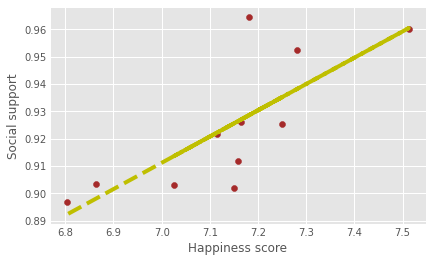

In [0]:

x=happiness_usa['Life Ladder']
y=happiness_usa['Social support']
plt.scatter(x,y,color="brown")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"y--")
plt.xlabel('Happiness score')
plt.ylabel('Social support')

plt.show()

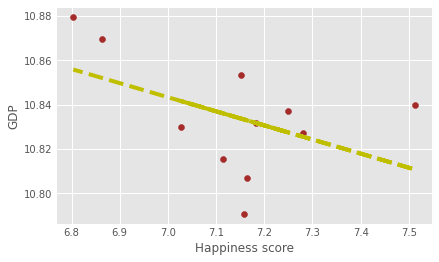

In [0]:

x=happiness_usa['Life Ladder']
y=happiness_usa['Log GDP per capita']
plt.scatter(x,y,color="brown")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"y--")
plt.xlabel('Happiness score')
plt.ylabel('GDP')

plt.show()

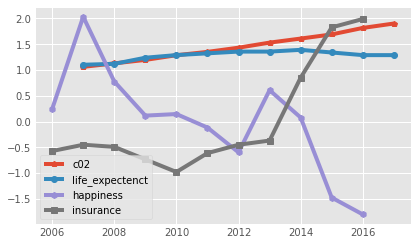

In [0]:
plt.plot(co2_mean.take[47:58].column('Year'),x[47:58],marker='p',label='c02')
plt.plot(life.take[47:58].column('Year'),y[47:58],marker='o',label='life_expectenct')
plt.plot(happiness_usa.column('year'),h,marker='h',label='happiness')
plt.plot(insurance.column('Year'),i,marker='s',label='insurance')
plt.legend()

In [0]:
z=x*y
correlation_r=z.sum()/len(z)
z1=x[47:58]*h
correlation_r1=z1.sum()/len(z1)
correlation_r1

-0.20574983540488703

In [0]:
corr_table=Table().with_column('co2',co2_mean.take[47:58].column(' interpolated mean'),'life_expectency',life.take[47:58].column('Life_expectency'),'happiness',happiness_usa.column('Life Ladder'),'Year',happiness_usa.column('year'),'insuarnce',insurance.column('with_insurance'))
corr_table1=corr_table.drop('Year')
c=corr_table1.to_df()
c.corr()

,co2,life_expectency,happiness,insuarnce
co2,1.000000,0.642179,-0.771124,0.815797
life_expectency,0.642179,1.000000,-0.410234,0.107196
happiness,-0.771124,-0.410234,1.000000,-0.705350
insuarnce,0.815797,0.107196,-0.705350,1.000000


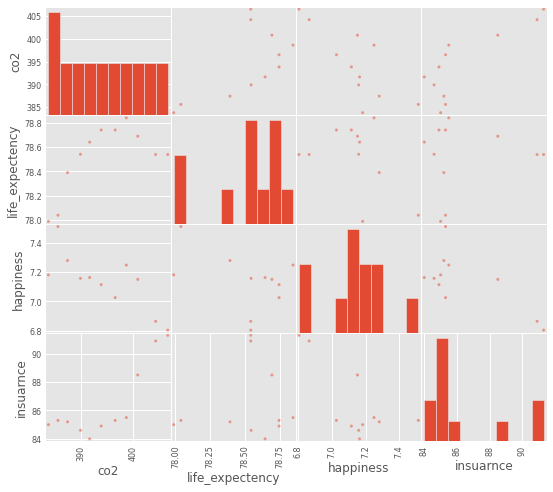

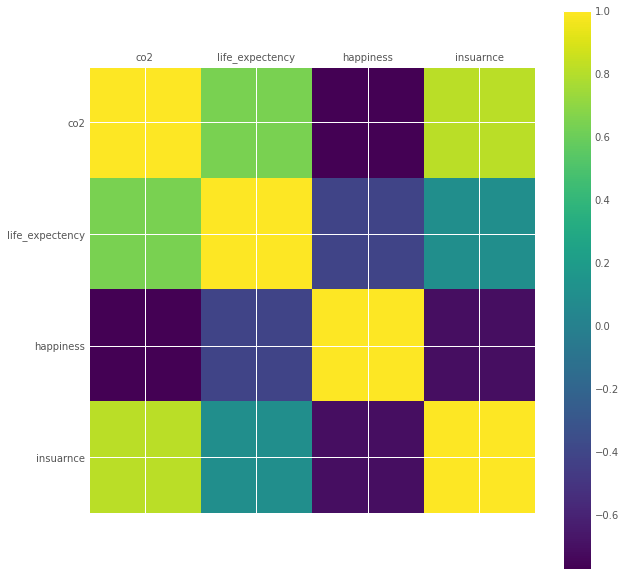

In [0]:
pd.plotting.scatter_matrix(c,figsize=(8,8))
plt.figure(figsize=(10,10))
plt.matshow(c.corr(),fignum=2)
plt.xticks(range(len(c.columns)), c.columns)
plt.yticks(range(len(c.columns)), c.columns)
plt.colorbar()



In [0]:
Happy2016_top20=Happiness_all.where('year',2016).sort('Life Ladder',descending=True).take[:20]
Happy2016_top20=Happy2016_top20.to_df()

In [0]:

import plotly.express as px

fig= px.scatter(data_frame=Happy2016_top20,x='Log GDP per capita',y='Life Ladder',size='Healthy life expectancy at birth',color='country',hover_name="country", log_x=True, size_max=60)
#fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
#	         size="pop", color="continent",
 #                hover_name="country", log_x=True, size_max=60)
fig.show()

In [0]:
Happiness_all_2016=Happiness_all.select('country','year','Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Generosity','Perceptions of corruption').where('year',2016)

In [0]:
Happiness_all_2016=Happiness_all_2016.drop('year').to_df()
Happiness_all_2016=Happiness_all_2016.rename(columns={"Life Ladder":"Happiness","Log GDP per capita":"GDP","Healthy life expectancy at birth":"Health","Perceptions of corruption":"corruption"})

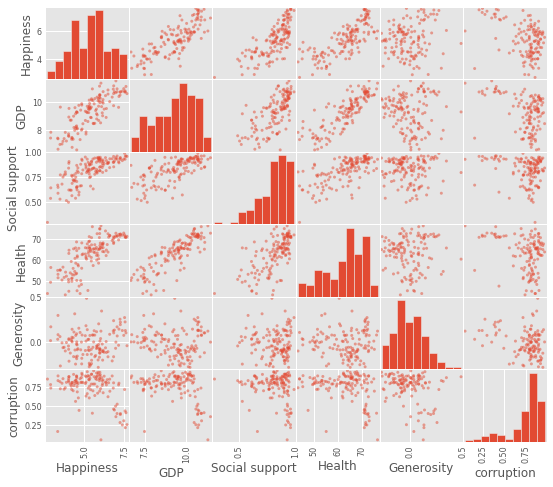

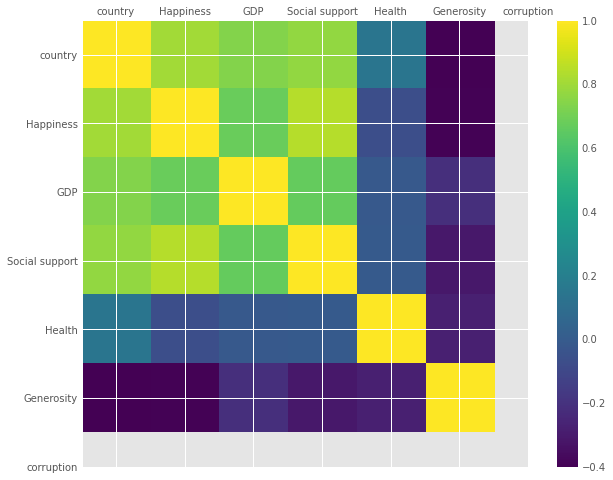

In [0]:
pd.plotting.scatter_matrix(Happiness_all_2016,figsize=(8,8))
plt.figure(figsize=(10,8))
plt.matshow(Happiness_all_2016.corr(),fignum=2)
plt.xticks(range(len(Happiness_all_2016.columns)), Happiness_all_2016.columns)
plt.yticks(range(len(Happiness_all_2016.columns)), Happiness_all_2016.columns)
plt.colorbar()



In [0]:
#happiness_usa=happiness_usa.rename(columns={"Life Ladder":"Happiness","Log GDP per capita":"GDP","Healthy life expectancy at birth":"Health","Perceptions of corruption":"corruption"})
h=stats.zscore(happiness_usa.column('Life Ladder'))
g=stats.zscore(happiness_usa.column('Log GDP per capita'))
s=stats.zscore(happiness_usa.column('Social support'))

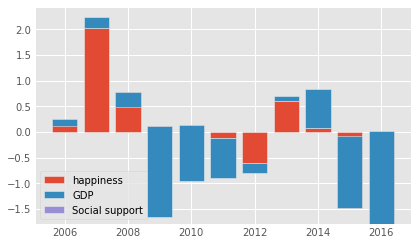

In [0]:
plt.bar(happiness_usa.column('year'),h,label='happiness')
plt.bar(happiness_usa.column('year'),g,bottom=h,label='GDP')
plt.bar(happiness_usa.column('year'),s,bottom=h,label='Social support')
plt.legend()